<a href="https://colab.research.google.com/github/Xeron66/Quantum-Computing-Notes/blob/main/Assignment_Foyez_Ahmed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment on Qiskit

Name: Foyez Ahmed

ID: 2013122042

CSE499A

Section: 5

# Installing Libraries

In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer
!pip install qiskit-ibmq-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.4 MB/s eta 0:00:00


# Importing Libraries

In [2]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
import numpy as np

# 1. Build a 1-qubit circuit and initialize its state in superposition without using any gate. Qubits must be in different relative phases. Implement proper state vector visualization technique. Explain your understanding in detail.

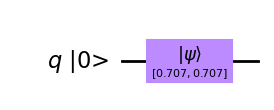

In [ ]:
# create a circuit
circuit = QuantumCircuit(1)

# set initial state

amplitude_0 = 1 / (2**0.5)
amplitude_1 = 1 / (2**0.5)

initial_state = [amplitude_0, amplitude_1]

# initialize state
circuit.initialize(initial_state, 0)

# draw circuit
circuit.draw(output = 'mpl', initial_state=True)

In [ ]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

Job Status: job has successfully run


<ipython-input-5-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


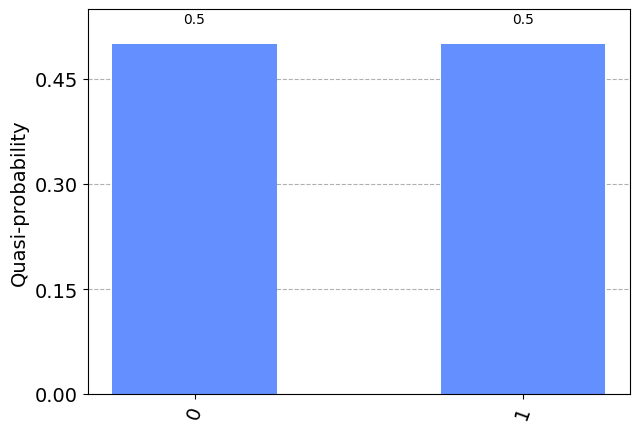

In [ ]:
# plotting histogram
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
print(final_state)
array_to_latex(final_state)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

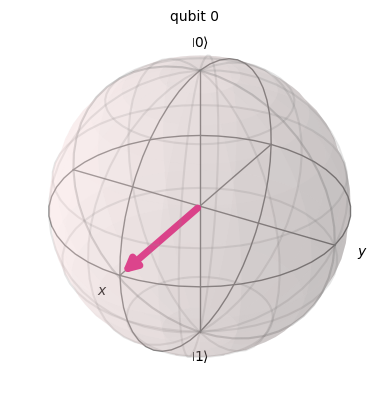

In [ ]:

plot_bloch_multivector(final_state)

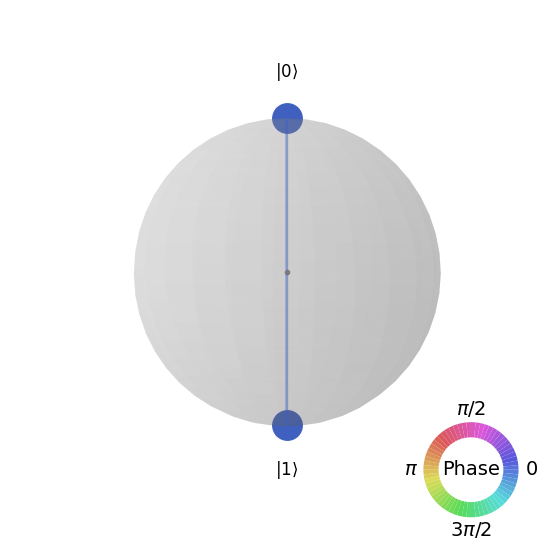

In [ ]:
plot_state_qsphere(final_state)

**Explanation**:
after creating a quantum circuit, the complex probability of |0> and |1> state is defined using a simple formula. This ensures that the qbits are in superposition state and are in relative phases.
Then, using the standard simulation method, the circuit is simulate. At first a histogram is printed where it is clearly seen that the probability of both |0> and |1> state is 50% meaning the qbits are in superposition sate.
Later on, the multivector is plotted where the direction of the qbit is visually represented.
Finally, using the qsphere both the superposition state and the phase angle is clearly visualized.

# 2. Create a circuit with the gates CCX , H, SX ( 𝑋 gate) in such a way that you always have roughly ¼ probability to get state |1> from the target qubit of CCX. Now, alter the circuit with Y basis measurement and explain the differences in outcome briefly.

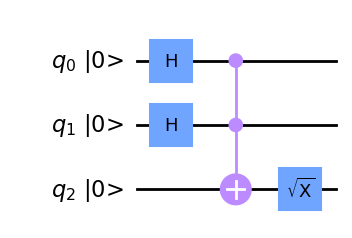

In [12]:
## create a circuit
circuit = QuantumCircuit(3)

## apply gates
# Apply Hadamard gate to the first qubit
circuit.h(0)
circuit.h(1)

# Apply CCX gate (Toffoli gate) with the first two qubits as controls and the third qubit as target
circuit.ccx(0, 1, 2)

# Apply SX gate (sqrt(X)) to the third qubit
circuit.sx(2)

# draw circuit
circuit.draw(output = 'mpl', initial_state=True)

In [4]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

Job Status: job has successfully run


<ipython-input-4-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


In [5]:
print(final_state)
array_to_latex(final_state)

Statevector([0.25+0.25j, 0.25+0.25j, 0.25+0.25j, 0.25-0.25j, 0.25-0.25j,
             0.25-0.25j, 0.25-0.25j, 0.25+0.25j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

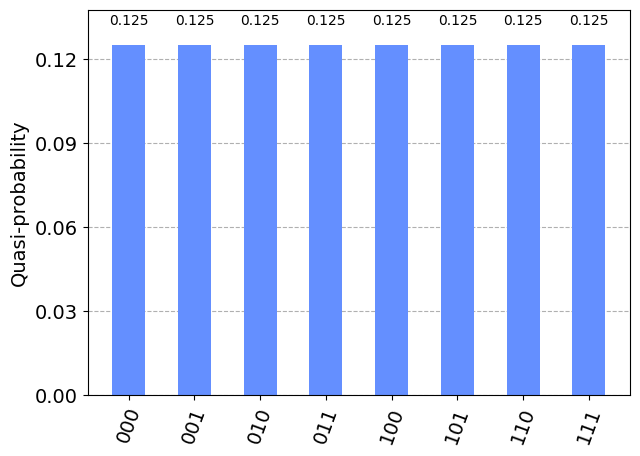

In [6]:
# plotting histogram
counts = result.get_counts()
plot_histogram(counts)

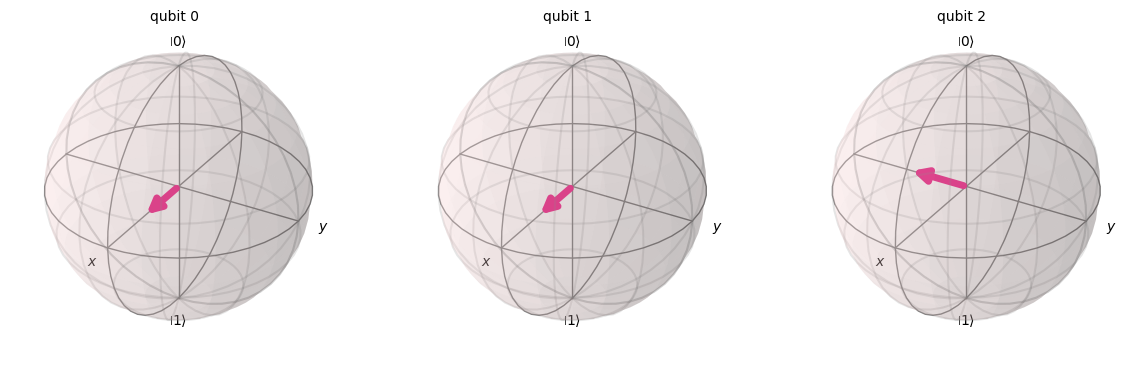

In [7]:
plot_bloch_multivector(final_state)

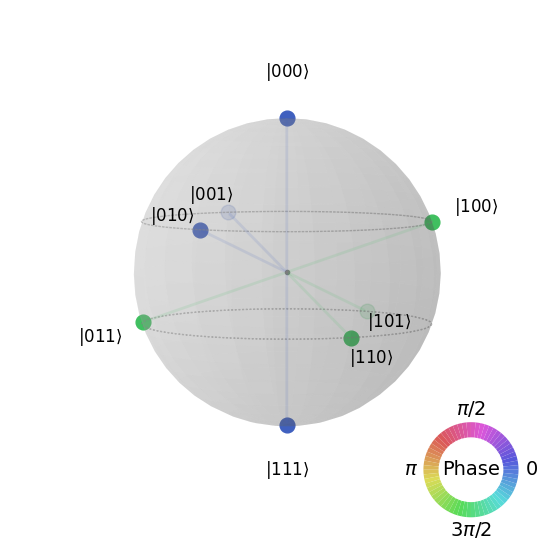

In [8]:
plot_state_qsphere(final_state)

**Explanation**:
We start by the usual way, creating the circuit. In the first qbit (0th), h-gate is applied, and in third qbit (2th), CCX and SX gate is applied. After which measurement is applied.

Then, applying the usual simulation method the final state is determined by getting the statevector from result. Finally, by plotting the histogram it can be seen that roughly 1/4 probability of getting state |1> from target qbit in ccx gate. We can also look at the state vector and see that exactly 1/4th is the outcome meaning we can use both the state vector and the multivector to check whether it is correct or not.

Now altering the circuit according to y basis measurement...


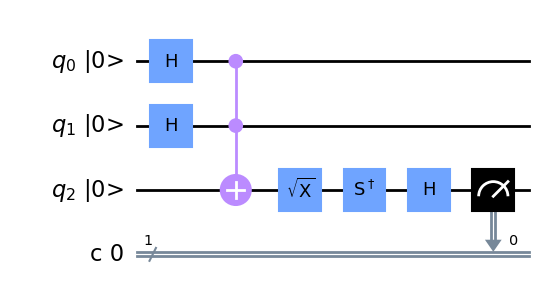

In [27]:
## create a circuit
circuit = QuantumCircuit(3, 1)

## apply gates
# Apply Hadamard gate to the first, and second qubit
circuit.h(0)
circuit.h(1)

# Apply CCX gate (Toffoli gate) with the first two qubits as controls and the third qubit as target
circuit.ccx(0, 1, 2)

# Apply SX gate (sqrt(X)) to the third qubit
circuit.sx(2)

## y - basis measurement (default)
circuit.sdg(2)
circuit.h(2)
circuit.measure(2, 0)

# draw circuit
circuit.draw(output = 'mpl', initial_state=True)

In [28]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-28-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [29]:
print(final_state)
array_to_latex(final_state)

Statevector([0.        +1.11022302e-16j, 0.        +1.11022302e-16j,
             0.        +1.11022302e-16j, 0.70710678-7.07106781e-01j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

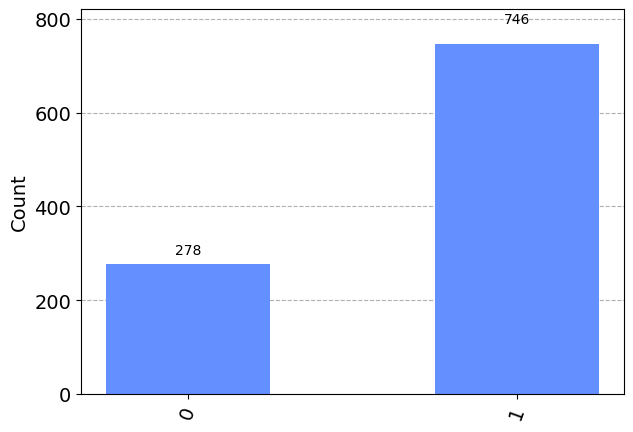

In [30]:
# plotting histogram
counts = result.get_counts()
plot_histogram(counts)

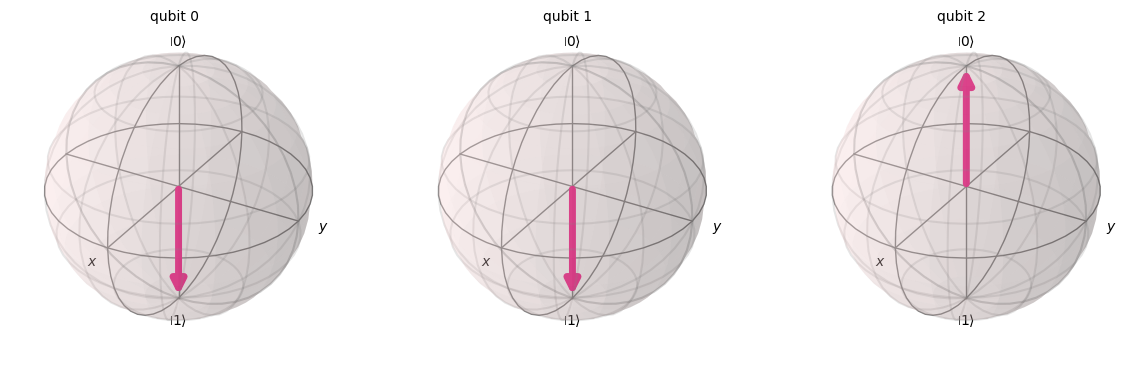

In [31]:
plot_bloch_multivector(final_state)

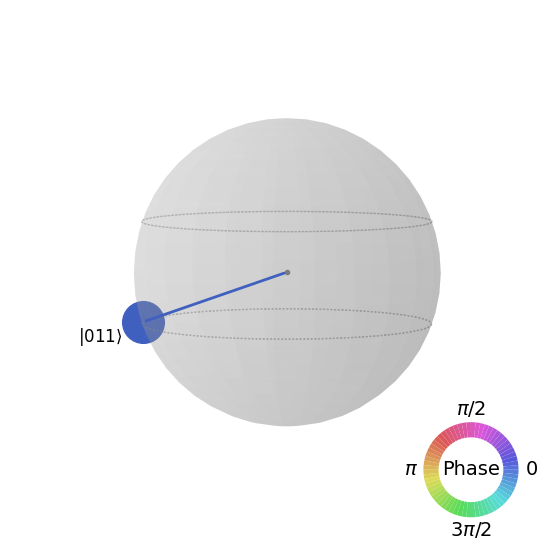

In [32]:
plot_state_qsphere(final_state)

**Explanation**:
now by altering the circuit by y basis measurement, we can see that the probability of getting |1> state increased up to 70% or the chances are 1/sqrt(2) times now.

# 3. Calculate the unitary for the circuit (both Z and Y basis measurement) created in problem 2. Explain the differences in outcome and your understanding briefly.

Calculating unitary using y - basis measurement:

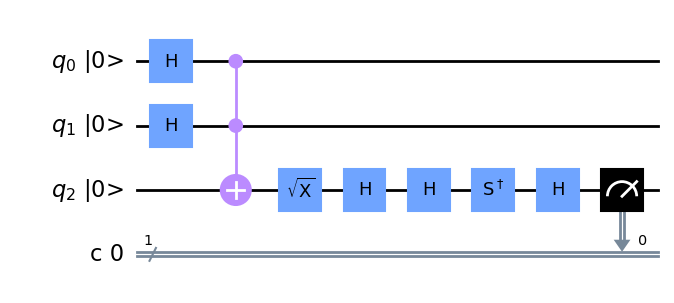

In [35]:
## create a circuit
circuit = QuantumCircuit(3, 1)

## apply gates
# Apply Hadamard gate to the first, and second qubit
circuit.h(0)
circuit.h(1)

# Apply CCX gate (Toffoli gate) with the first two qubits as controls and the third qubit as target
circuit.ccx(0, 1, 2)

# Apply SX gate (sqrt(X)) to the third qubit
circuit.sx(2)

# applying unitary using hadamard gates
circuit.h(2)
circuit.h(2)

## y - basis measurement (default)
circuit.sdg(2)
circuit.h(2)
circuit.measure(2, 0)

# draw circuit
circuit.draw(output = 'mpl', initial_state=True)

In [36]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-36-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [37]:
print(final_state)
array_to_latex(final_state)

Statevector([1.11022302e-16+2.22044605e-16j,
             0.00000000e+00+2.22044605e-16j,
             0.00000000e+00+2.22044605e-16j,
             7.07106781e-01-7.07106781e-01j,
             0.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

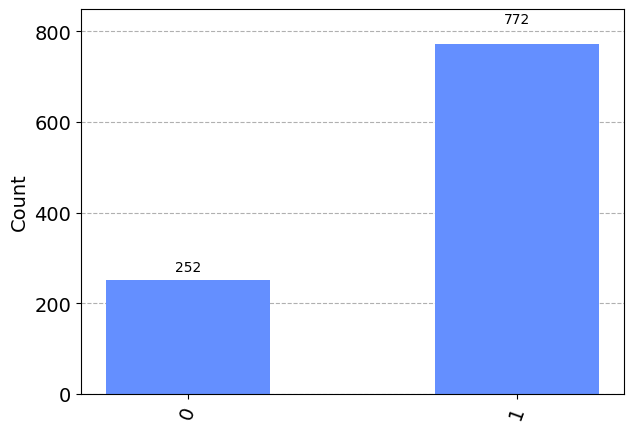

In [38]:
# plotting histogram
counts = result.get_counts()
plot_histogram(counts)

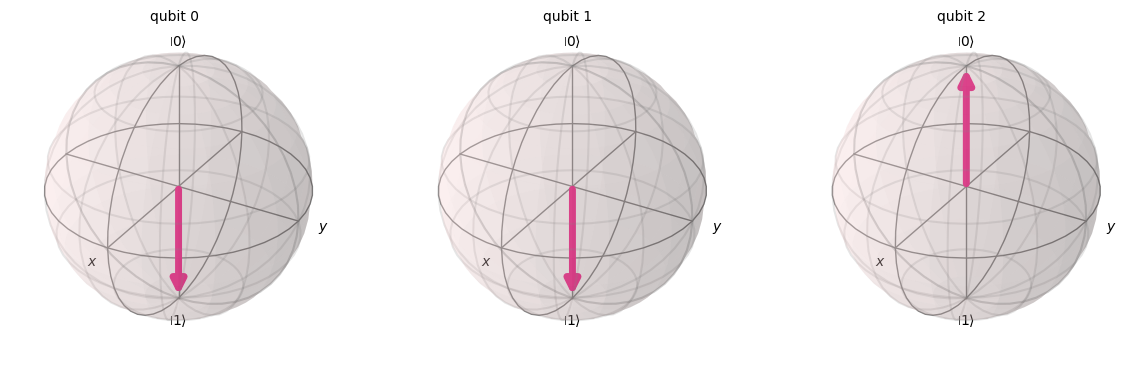

In [39]:
plot_bloch_multivector(final_state)

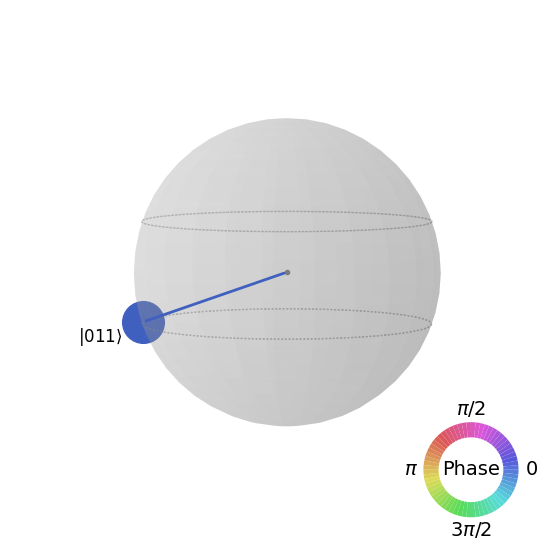

In [40]:
plot_state_qsphere(final_state)

Calculating unitary using z - basis measurement:

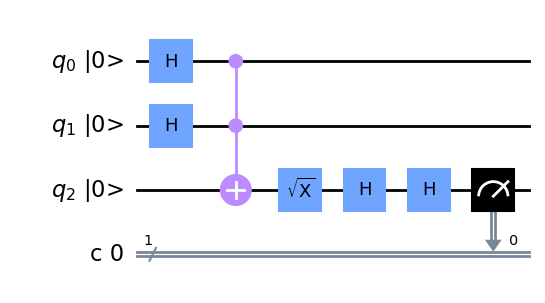

In [41]:
## create a circuit
circuit = QuantumCircuit(3, 1)

## apply gates
# Apply Hadamard gate to the first, and second qubit
circuit.h(0)
circuit.h(1)

# Apply CCX gate (Toffoli gate) with the first two qubits as controls and the third qubit as target
circuit.ccx(0, 1, 2)

# Apply SX gate (sqrt(X)) to the third qubit
circuit.sx(2)

# applying unitary using hadamard gates
circuit.h(2)
circuit.h(2)

## z - basis measurement (default)
circuit.measure(2, 0)

# draw circuit
circuit.draw(output = 'mpl', initial_state=True)

In [42]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-42-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [45]:
print(final_state)
array_to_latex(final_state)

Statevector([0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.35355339-0.35355339j, 0.35355339-0.35355339j,
             0.35355339-0.35355339j, 0.35355339+0.35355339j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

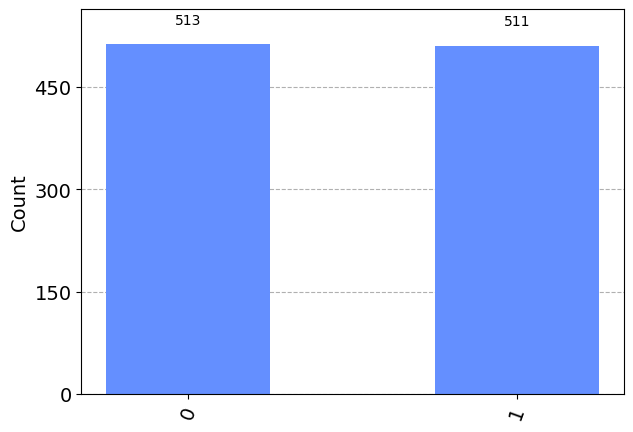

In [46]:
# plotting histogram
counts = result.get_counts()
plot_histogram(counts)

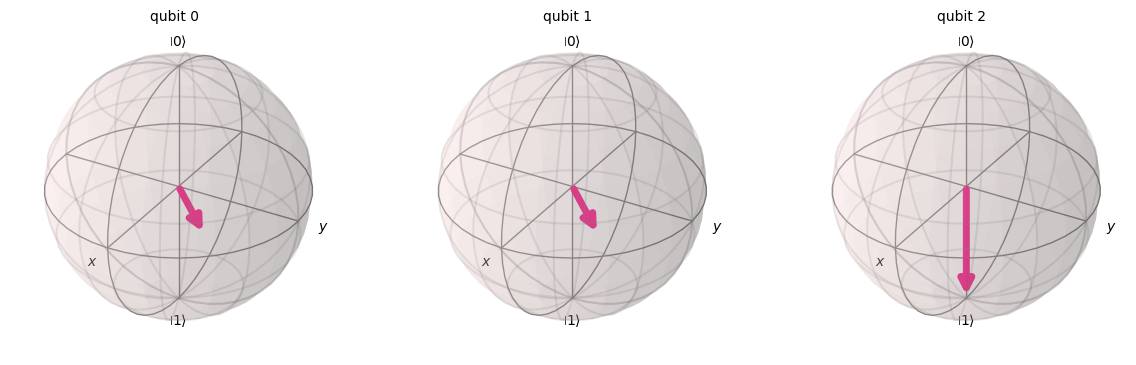

In [47]:
plot_bloch_multivector(final_state)

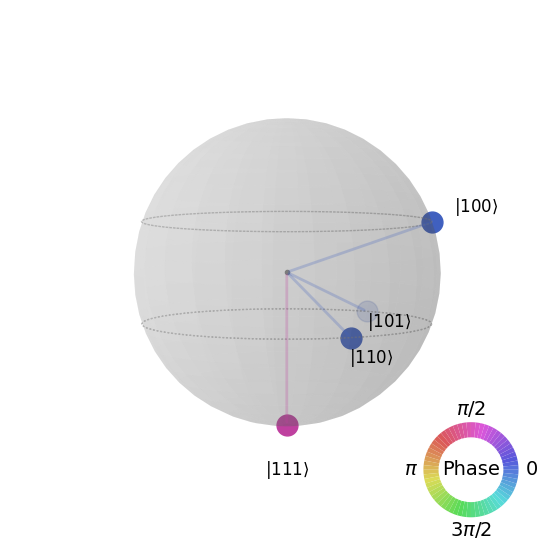

In [48]:
plot_state_qsphere(final_state)

**Explanation**:
To apply unitary we know that if we apply two hadamard gates consequtively on a qbit, it acts as a unitary matrix, in our case a gate.  

By applying unitary, we will always get the same outcome in return. And, just like that principle we see that by applying unitary to the y and z measurements varients we are getting the same outcome as we wouldve got if we didnt apply unitary.

By applying y - basis measurements we see that the probability of getting |1> state increased up to 70%, and by applying z - basis measurement we see that the probability of getting |1> became 50/50.

# 4. Create an entanglement circuit with H, CX gate and apply measurement. Run on both a simulator and real quantum device. Compare the results you obtained by plotting histograms. Explain your understanding in detail.

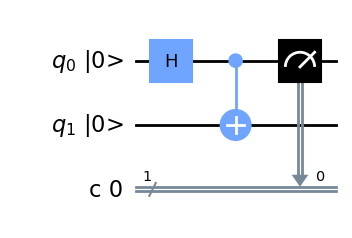

In [ ]:
## create circuit
circuit = QuantumCircuit(2, 1)

## apply gates

# applying Hadamard gate to make the qbit go into superposition
circuit.h(0)

# applying Controlled NOT gate, CX gate
circuit.cx(0, 1)

# apply measurement
# here we are measuring 0th qbit and storing in 0th cbit
circuit.measure(0, 0)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [ ]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-235-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


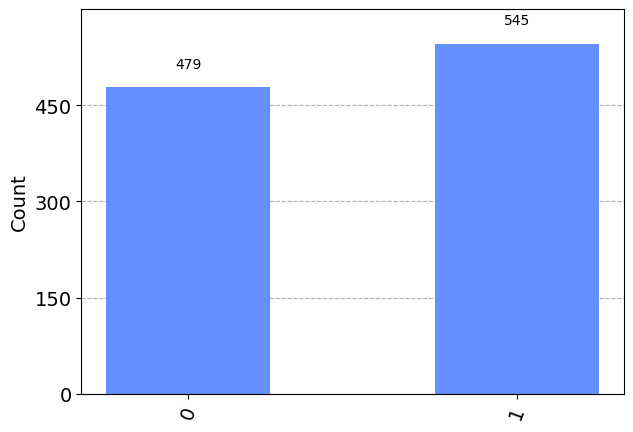

In [ ]:
# plotting histogram
counts = result.get_counts()
plot_histogram(counts)

now using a real quantum device...

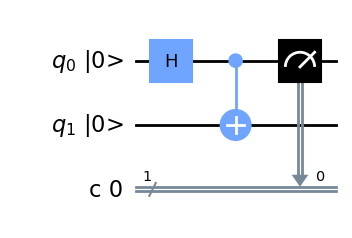

In [ ]:
## create circuit
circuit = QuantumCircuit(2, 1)

## apply gates

# applying Hadamard gate to make the qbit go into superposition
circuit.h(0)

# applying Controlled NOT gate, CX gate
circuit.cx(0, 1)

# apply measurement
# here we are measuring 0th qbit and storing in 0th cbit
circuit.measure(0, 0)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [ ]:

## import library for QC (Quantum Computer)
from qiskit import IBMQ

## save API Token
IBMQ.save_account('1192be126933d579aedd7f316c9a298a4be662cf797f468631995e273bc5d39c9b7cfa3288700afdb3b74428cb88b96b77ea6c7ac21f606397212ea6b3fabb07')

## load account
IBMQ.load_account()

# select provider
provider = IBMQ.get_provider('ibm-q')

## select quantum device
# you can change the computer based on the names on IBM website
qcomp = provider.get_backend('ibm_nairobi')

## run on real device
# to execute we call the execute F^n that has two arguments
# one is the circuit we want and the other is the platform we want to
# simulate on, in our case its a real device
# this will return a job
job = execute(circuit, backend = qcomp)

## monitor the job
job_monitor(job)

## get result
result = job.result()

## get histogram data
count = result.get_counts()

# Note: if it takes longer to execute the job, just change the
# machine, Tip => use the one with 5000 qubits!!

configrc.store_credentials:WARNING:2023-09-07 02:52:50,347: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-09-07 02:52:50,795: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


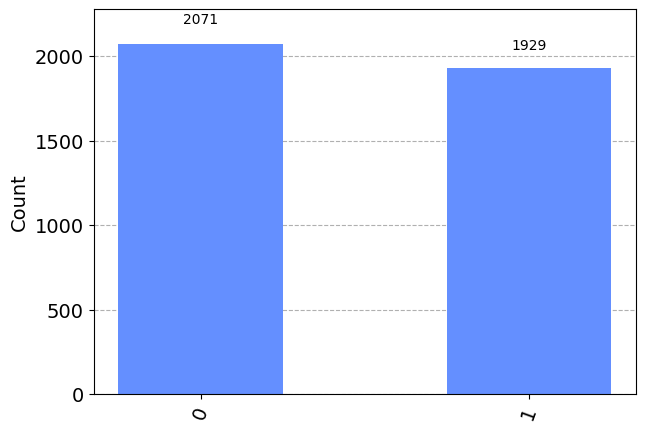

In [ ]:
plot_histogram(count)

**Explanation**:
We can see that when we are using the simulator, there is almost always a 50/50 chance but when we are using the real quantum machine, this value becomes spreadout and its not 50/50 as there are noises while computing in quantum computer.

# 5. Show Heisenberg uncertainty principle in action for X, Y and Z basis measurement. Explain your understanding in detail with proper visualization.
A. Initialize a state in X basis and measure in X,Y and Z basis.

B. Initialize a state in Y basis and measure in X,Y and Z basis.

C. Initialize a state in Z basis and measure in X,Y and Z basis.


## A. Initializing in x - basis and measuring in x - basis

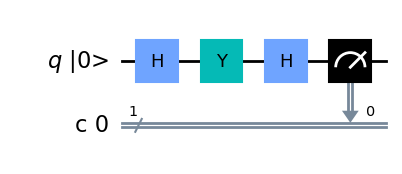

In [73]:
## create circuit
circuit = QuantumCircuit(1,1)

## apply gates

# applying Hadamard gate to make the qbit go into superposition
circuit.h(0)
circuit.y(0)

## apply measure
circuit.h(0)
circuit.measure(0, 0) # Z - basis measurement (default)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [74]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-74-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


Initial State:

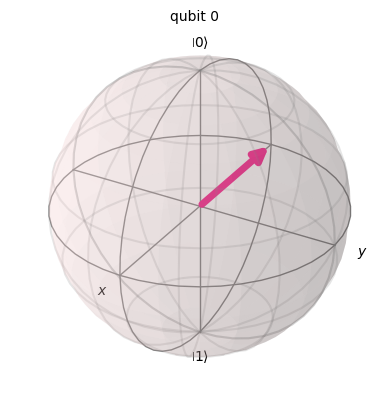

In [66]:
plot_bloch_multivector(final_state)

Final State:

1st Try:

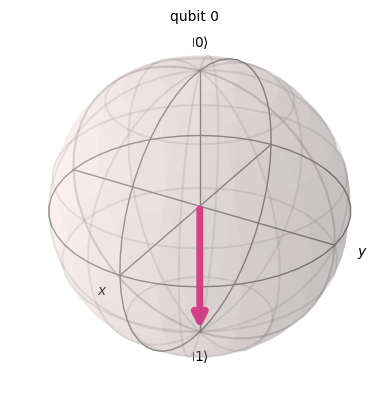

In [69]:
plot_bloch_multivector(final_state)

2nd Try:

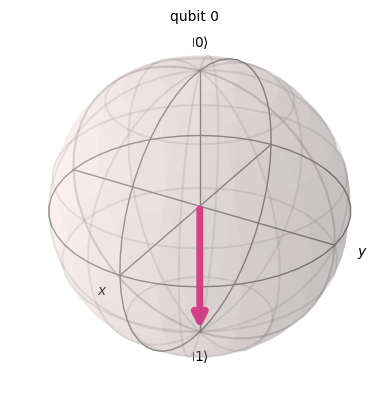

In [72]:
plot_bloch_multivector(final_state)

3rd Try:

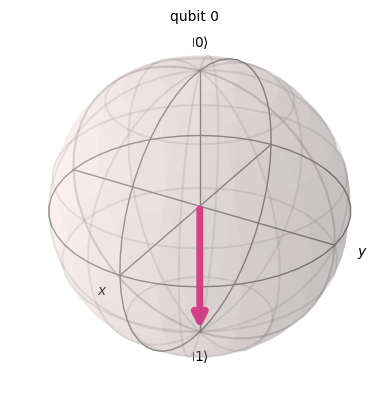

In [75]:
plot_bloch_multivector(final_state)

This concludes that, initializing in one basis and measuring in the same basis gives the expected outcome as result no matter how many times we run the simulation or measure it.

Now,

initializing in x - basis and measuring in y basis

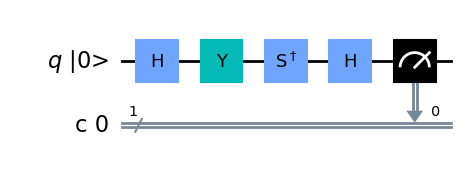

In [79]:
## create circuit
circuit = QuantumCircuit(1,1)

## apply gates

# applying Hadamard gate to make the qbit go into superposition
circuit.h(0)
circuit.y(0)

## apply y - basis measure
circuit.sdg(0)
circuit.h(0)
circuit.measure(0, 0)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [80]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-80-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


Final State:

1st try:

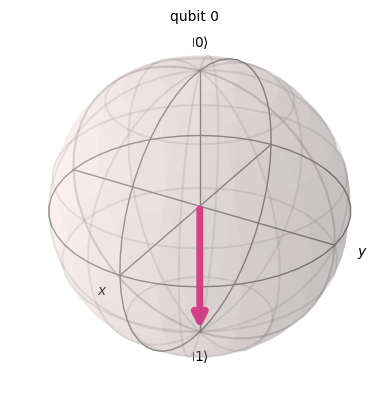

In [78]:
plot_bloch_multivector(final_state)

2nd Try:

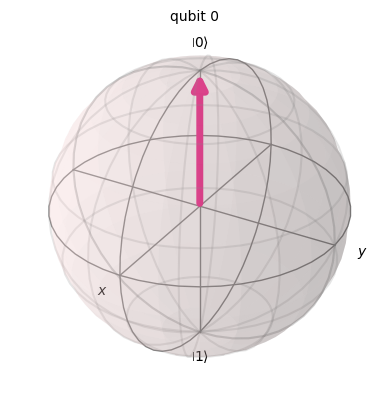

In [81]:
plot_bloch_multivector(final_state)

By this we can understand that, initilizing in one basis and measuring in another will give random outcomes as result.

Now,

initilizing in x - basis and measuring in z - basis

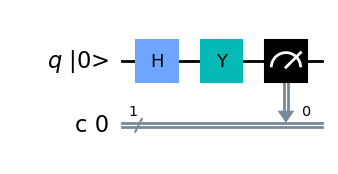

In [90]:
## create circuit
circuit = QuantumCircuit(1,1)

## apply gates

# applying Hadamard gate to make the qbit go into superposition
circuit.h(0)
circuit.y(0)

## apply z - basis measure
circuit.measure(0, 0)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [91]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-91-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


Final State:

1st try:

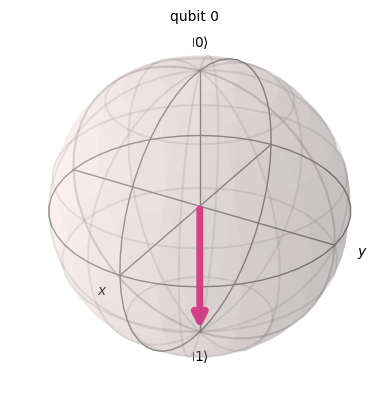

In [86]:
plot_bloch_multivector(final_state)

2nd Try:

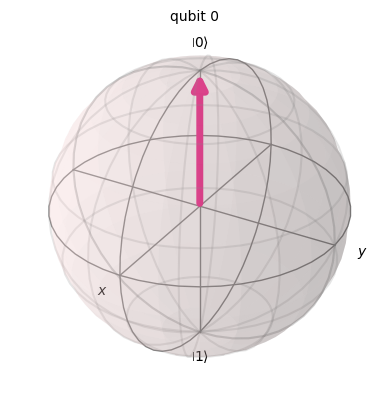

In [92]:
plot_bloch_multivector(final_state)

By this we can understand that, initilizing in one basis and measuring in another will give random outcomes as result.

## B. Initialize in Y - basis and measure in X, Y, Z - basis.

Now,

Initialize in y - basis and measuring in x - basis.

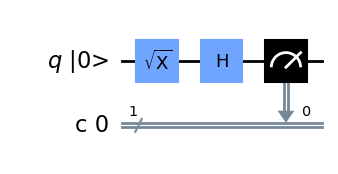

In [107]:
## create circuit
circuit = QuantumCircuit(1,1)

## apply gates
circuit.sx(0)

## x - basis measurement (default)
circuit.h(0)
circuit.measure(0, 0)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [108]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-108-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


Initial State:

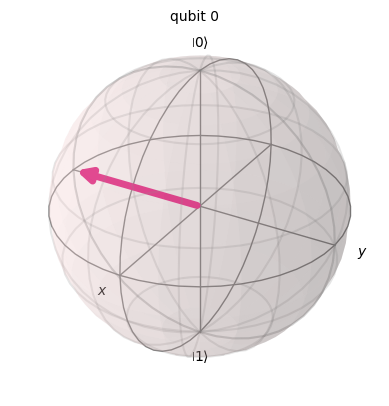

In [97]:
plot_bloch_multivector(final_state)

Final state:

1st try:

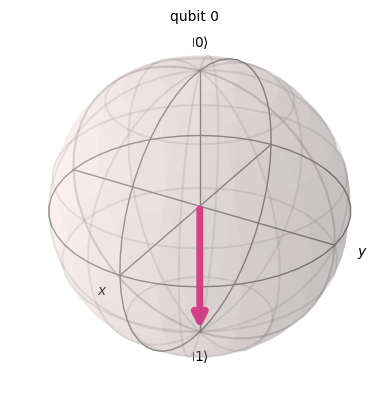

In [100]:
plot_bloch_multivector(final_state)

2nd Try:

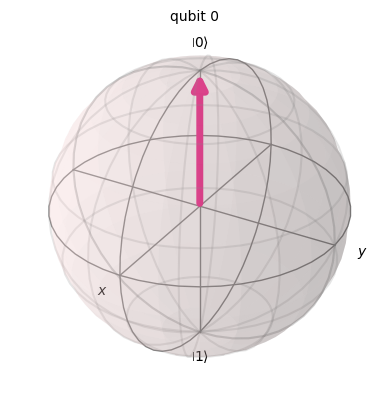

In [109]:
plot_bloch_multivector(final_state)

By this we can understand that, initilizing in one basis and measuring in another will give random outcomes as result.

Now,

Initializing in y - basis and measuring in y basis

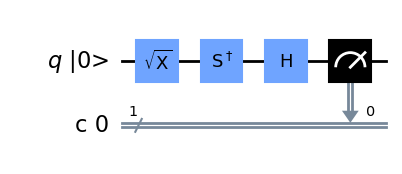

In [115]:
## create circuit
circuit = QuantumCircuit(1,1)

## apply gates
circuit.sx(0)

## y - basis measurement (default)
circuit.sdg(0)
circuit.h(0)
circuit.measure(0, 0)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [116]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-116-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


Initial State:

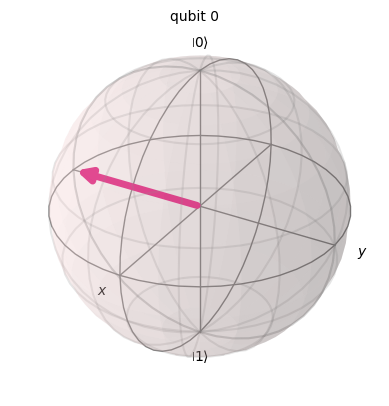

In [113]:
plot_bloch_multivector(final_state)

Final State:

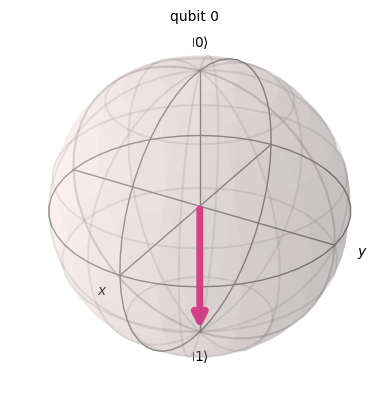

In [117]:
plot_bloch_multivector(final_state)

This concludes that, initializing in one basis and measuring in the same basis gives the expected outcome as result no matter how many times we run the simulation or measure it.

Now,

initializing in y - basis and measuring in z - basis

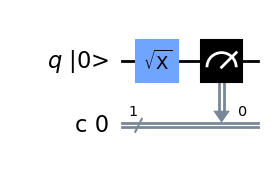

In [140]:
## create circuit
circuit = QuantumCircuit(1,1)

## apply gates
circuit.sx(0)

## z - basis measurement (default)
circuit.measure(0, 0)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [141]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-141-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


Final state:

1st try:

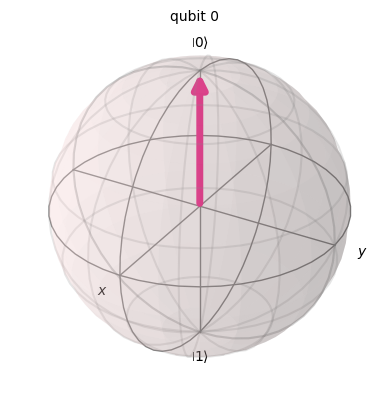

In [120]:
plot_bloch_multivector(final_state)

2nd Try:

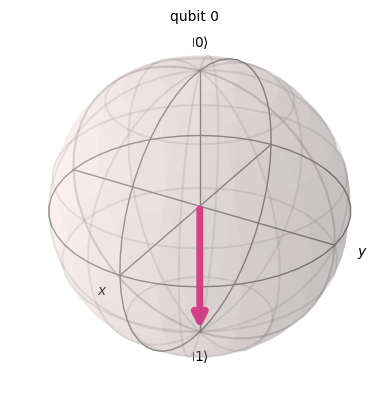

In [142]:
plot_bloch_multivector(final_state)

By this we can understand that, initilizing in one basis and measuring in another will give random outcomes as result.

## C. Initilizing in Z - basis and measuring in X, Y, and Z basis

Now,

Initializing in Z - basis and measuring in X - basis

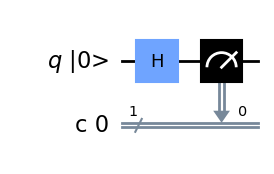

In [150]:
## create circuit
circuit = QuantumCircuit(1,1)

## x - basis measurement (default)
circuit.h(0)
circuit.measure(0, 0)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [151]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-151-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


Inital State:

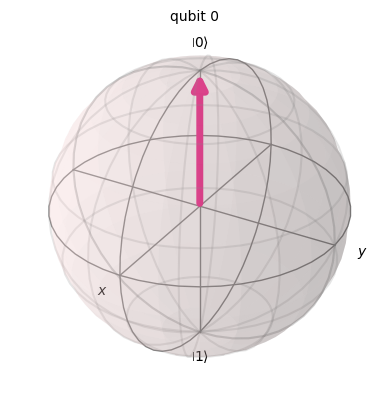

In [145]:
plot_bloch_multivector(final_state)

Final State:

1st Try:

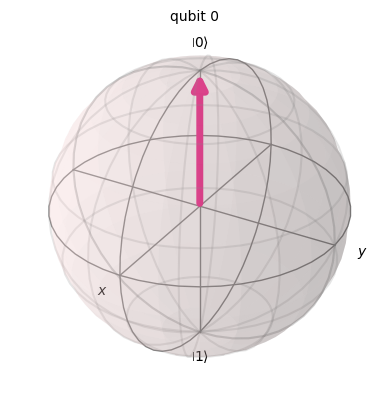

In [149]:
plot_bloch_multivector(final_state)

2nd Try:

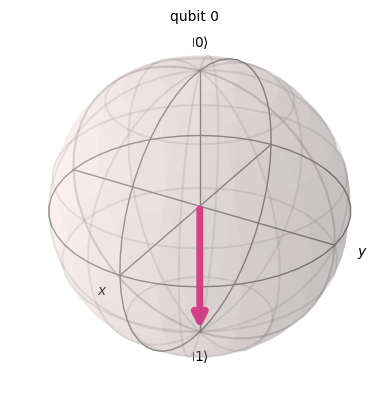

In [152]:
plot_bloch_multivector(final_state)

By this we can understand that, initilizing in one basis and measuring in another will give random outcomes as result.

Now,

Initializing in Z - basis and measuring in Y - basis

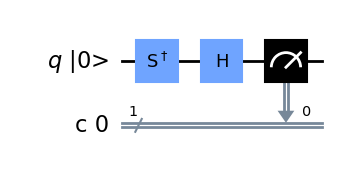

In [157]:
## create circuit
circuit = QuantumCircuit(1,1)

## apply gates
# circuit.sx(0)

## y - basis measurement (default)
circuit.sdg(0)
circuit.h(0)
circuit.measure(0, 0)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [158]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-158-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


Final State:

1st Try:

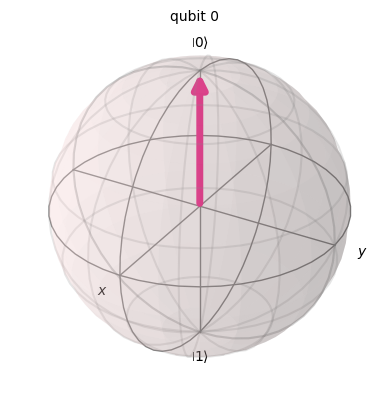

In [156]:
plot_bloch_multivector(final_state)

2nd Try

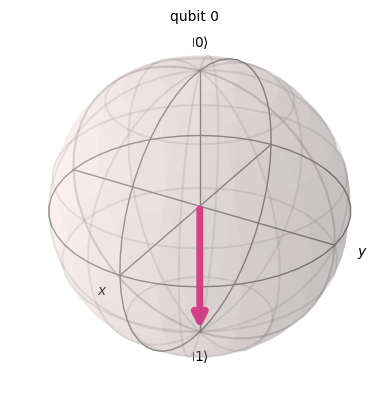

In [159]:
plot_bloch_multivector(final_state)

By this we can understand that, initilizing in one basis and measuring in another will give random outcomes as result.

Now,

Initializing in Z - basis and measuring in Z - basis

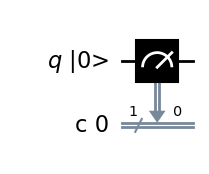

In [160]:
## create circuit
circuit = QuantumCircuit(1,1)

## apply gates
# circuit.sx(0)

## y - basis measurement (default)
circuit.measure(0, 0)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [161]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-161-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


Final State:

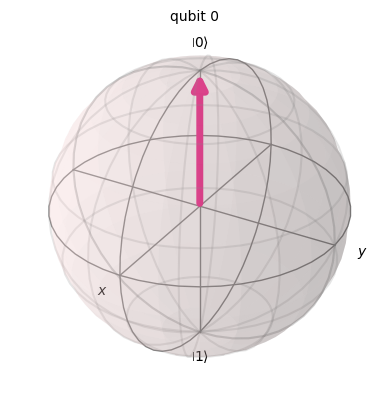

In [162]:
plot_bloch_multivector(final_state)

So we can clearly see that, if we initialize in one basis and measure in the same basis we will always get the expected outcome.